In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

from sklearn import metrics

# PROBAR NO ORDINALES y MODELO BOOST

In [43]:
def getDummy(df):
    df_dummy = pd.get_dummies(df,drop_first=True)
    
    return df_dummy

def dropYZ(df):
    df_drop = df.drop(columns=["y","z"],axis=1)
    return df_drop
    
def dropXYZ(df):
    df_drop = df.drop(columns=["x","y","z"],axis=1)
    return df_drop

def standarize(df):
    df_standar = df.set_index("id")
    

def dropPrice(df):
    df_drop = df.drop(columns=["price"],axis=1)
    return df_drop

def toCSV(df,name):
    df.to_csv(f"../outputs/{name}.csv")
    
def indexId(df):
    df_id = df.set_index("id")
    return df_id

def getStandarTrain(df):
    df = indexId(df)
    #df = getDummy(df)
    df = dropXYZ(df)
    
    X = dropPrice(df)
    y = df["price"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

def NotDummy(df):
    cut = {'Ideal':4,'Premium':3,'Very Good':2,'Good':1,'Fair':0}
    color = {'D':6,'E':5,'F':4,'G':3,'H':2,'I':1,'J':0}
    clarity = {'IF':7,'VVS1':6,'VVS2':5,'VS1':4,'VS2':3,'SI1':2,'SI2':1,'I1':0}
    
    df["cut"] = df["cut"].replace(cut)
    df["color"] = df["color"].replace(color)
    df["clarity"] = df["clarity"].replace(clarity)
    
    return df

In [44]:
# TRAINING dataset
dftr = pd.read_csv("../inputs/diamonds_train.csv")
dftr = NotDummy(dftr)
dftr.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.78,3,4,4,61.5,58.0,5.93,5.98,3.66,3446
1,1,0.31,4,6,2,60.8,56.0,4.37,4.32,2.64,732
2,2,0.30,4,4,2,62.3,54.0,4.30,4.34,2.69,475
3,3,1.04,4,5,5,62.0,58.0,6.54,6.46,4.03,9552
4,4,0.65,4,0,2,61.4,55.0,5.58,5.62,3.44,1276


In [45]:
# TEST dataset
dftt = pd.read_csv("../inputs/diamonds_test.csv")
dftt = NotDummy(dftt)
dftt.head()

,id,carat,cut,color,clarity,depth,table,x,y,z
0,0,1.10,3,2,1,62.2,58.0,6.69,6.60,4.13
1,1,0.51,4,1,2,62.5,57.0,5.07,5.10,3.18
2,2,2.03,3,3,2,61.9,59.0,8.14,8.09,5.02
3,3,1.21,3,4,2,60.0,60.0,6.96,6.91,4.16
4,4,0.55,4,4,2,61.8,55.0,5.27,5.22,3.24


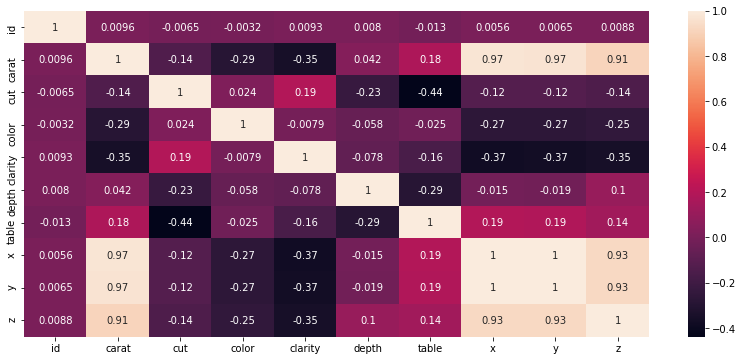

In [46]:
mc = dftt.corr()
plt.figure(figsize=(14,6))
sn.heatmap(mc,annot=True)